# Feature Engineering

- Convertir los features en el espacio original en nuevas representaciones mas útiles para la herramienta a utilizar (regresión lineal, regresión logística, svm, etc).
- Para elegir dicha conversión, se utiliza el conocimiento que se tiene con respecto al dominio de los datos.

Ej:

ECG -> Transformada ondita  
Audio -> FFT

Empezaremos viendo una técnica sencilla de feature engineering, que es la aumentación polinomial.

## Features Polinomiales

Se utilizan para capturar correlaciones no lineales entre variables.  
Se hacen todas las multiplicaciones posibles entre los distintos predictores N veces, para obtener los features polinomiales de orden N.  
Por ejemplo, si originalmente se tienen dos variables $[a,b]$, para tener los features de orden 2 se multiplican todas las combinaciones de variables (no se tienen en cuenta las repetidas):   
$$([a,b][a,b])=[a^2,a.b,b^2]$$  

De esta manera obtenemos tres nuevos features y los features totales quedan:  

$$[a,b,a^2,a.b,b^2]$$

Siguiendo el mismo razonamiento, se pueden tener los features de orden 3:

$$([a,b][[a^2,a.b,b^2])=[a^3,a^2.b,a.b^2,b^3]$$

Por lo tanto los features totales quedan:

$$([a,b,a^2,a.b,b^2,a^3,a^2.b,a.b^2,b^3])$$

Mas info en:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt


In [2]:
# Generamos un dataset con separación parabólica
X=np.random.uniform(-1,1,size=(10000,2))
y = 1*(2*(X[:,0]**2 +  2*X[:,1]*X[:,0])<0.09)

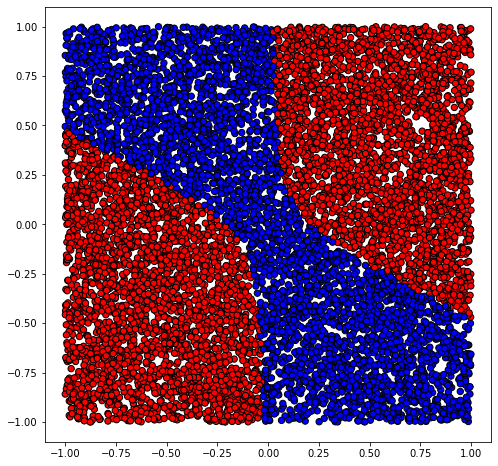

In [3]:
plt.figure(figsize=(8,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:,0],X[:,1],c=y, cmap=cm_bright,
               edgecolors='k', s=40, marker='o')
plt.show()

In [4]:
# Aplicamos regresión logística
clf=LogisticRegression(C=1e20,solver='lbfgs')
clf.fit(X,y)
print(clf.score(X,y))
print(clf.coef_)
print(clf.intercept_)


0.5799
[[ 0.03397251 -0.01123732]]
[-0.32240463]


C:\Users\jvidela\dev\diplo-dl\02- Machine Learning\Regresion-Logistica\helper.py:162: UserWarning: No contour levels were found within the data range.
  ax.contour(x1, x2, Z_nn, (0.5,), colors='b', linewidths=1)


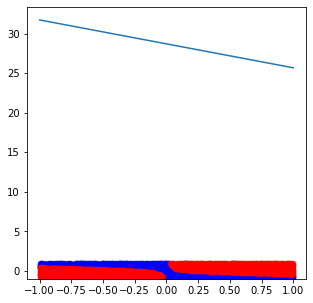

In [5]:
import helper
%matplotlib inline
helper.plotBoundary(X, y, clf, 100)

#hacemos esta gráfica para mostrar dónde queda el umbral de decisión
plt.plot([-1,1],[(-clf.coef_[0][0]+clf.intercept_)/clf.coef_[0][1] ,(clf.coef_[0][0]+clf.intercept_)/clf.coef_[0][1]])
plt.show()

In [6]:
# buscamos los features polinómicos de orden 2
poly = PolynomialFeatures(2,include_bias=False)
X_2=poly.fit_transform(X,)
print(X_2)
print(X)

[[-9.18770857e-01  2.21880615e-02  8.44139888e-01 -2.03857443e-02
   4.92310074e-04]
 [ 9.57898275e-01  2.26407891e-01  9.17569105e-01  2.16875728e-01
   5.12605332e-02]
 [-4.59174622e-01 -7.75843333e-01  2.10841333e-01  3.56247569e-01
   6.01932877e-01]
 ...
 [-3.91817364e-01  8.02626844e-01  1.53520847e-01 -3.14483134e-01
   6.44209850e-01]
 [ 8.29169435e-01  2.18817628e-01  6.87521952e-01  1.81436889e-01
   4.78811544e-02]
 [ 4.42190286e-01  2.74810056e-01  1.95532249e-01  1.21518337e-01
   7.55205670e-02]]
[[-0.91877086  0.02218806]
 [ 0.95789827  0.22640789]
 [-0.45917462 -0.77584333]
 ...
 [-0.39181736  0.80262684]
 [ 0.82916944  0.21881763]
 [ 0.44219029  0.27481006]]


In [7]:
clf=LogisticRegression(C=1e20,solver='lbfgs')
clf.fit(X_2,y)
print(clf.score(X_2,y))
print(clf.coef_)
print(clf.intercept_)

1.0
[[-4.17331635e+01  5.30553863e+01 -1.64935935e+05 -3.29507124e+05
   1.50774948e+02]]
[7412.79346253]


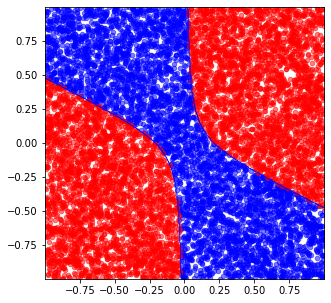

In [8]:
helper.plotBoundary(X, y, clf, 1000,degree=2,include_bias=False)

## Pesos y alturas

In [10]:
import pandas as pd
N=100
degrees=15
# df = pd.read_csv('https://raw.githubusercontent.com/rn-2019-itba/Clase-4---LDA---QDA---RL---DT---RF/master/data/alturas-pesos-mils-train.csv')
df = pd.read_csv('./data/alturas-pesos-mils-train.csv')
df["Genero"]=(df["Genero"]!="Hombre").astype(int)
X=df[['Peso','Altura']].values[:N,:]
y=df['Genero'].values[:N]
X_test=df[['Peso','Altura']].values[N:10000+N,:]
y_test=df['Genero'].values[N:10000+N]
train_scores=list()
test_scores=list()
for degree in range(1,degrees):
    # buscamos los features polinómicos de orden 2
    poly = PolynomialFeatures(degree,include_bias=False)
    X_2=poly.fit_transform(X,)
    clf=clf = LogisticRegression(random_state=3,
                         multi_class='auto',C=1e20, max_iter=10000,solver='sag')
    clf.fit(X_2, y)
    X_2_test=poly.fit_transform(X_test)
    train_scores.append(clf.score(X_2,y))
    test_scores.append(clf.score(X_2_test,y_test))
    

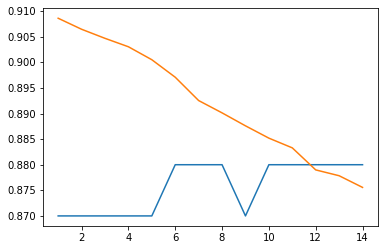

In [11]:
plt.plot(range(1,degrees),train_scores)
plt.plot(range(1,degrees),test_scores)
plt.show()

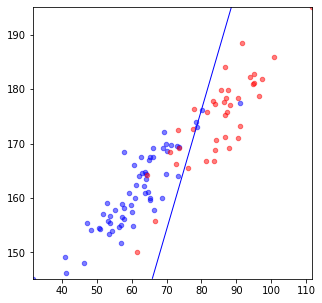

In [12]:
helper.plotBoundary(X, y, clf, 1000,degree=degree,include_bias=False)

## Variables categóricas (One Hot Encoding)

Cuando trabajamos con variables categóricas (por ejemplo, barrio de residencia), se suele utilizar un número de índice para referirse a la categoría.

Ej:

1: Flores
2: Paternal
3: Belgrano
4: Recoleta
5: Nuñez

este tipo de asignación hace que las distintas categorías guarden una relación numérica entre sí, cuando en realidad no la tienen. Para una regresión logística, Paternal va a aportar siempre el doble del valor a la suma que determina el umbral que Flores. Belgrano, el triple. Etc.

Esto es algo que no es deseado ya que esa relación numérica muchas veces no tiene sentido por lo que las variables representan.
Es por ello que dichas variables categóricas de K índices se suelen transformar en K variables categóricas cuyos valores pueden ser 1 ó 0 y solo úna de todas las categorías puede valer 1. De esta forma nos queda:

Flores: $[1,0,0,0,0]$  
Paternal: $[0,1,0,0,0]$
Belgrano: $[0,0,1,0,0]$
Recoleta: $[0,0,0,1,0]$
Nuñez: $[0,0,0,0,1]$

En el caso de la regresión logística, por cada variable que tenga K categorías, en vez de haber 1 coeficiente para esa variable habrá K coeficientes.

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [14]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [15]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [16]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [17]:
enc.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_1', 'x1_2', 'x1_3'], dtype=object)

### Features polinomiales con variables categóricas

Cuando se utilizan variables categóricas con OHE (caso típico), estas no son tenidas en cuenta a la hora de calcular los features polinomiales ya que cuando se hacen los productos cruzados, como estas variables valen 0 ó 1, lo que queda es un valor fijo de 0 para K-1 variables, y para una variable el valor del feature continuo original.

## Normalización de variables (Z-score)

Muchas veces se normalizan las variables de entrada (restando la media y dividiendo por el desvío estandar). Esto hace que todas las variables queden en el mismo rango y a la hora de aplicar los algoritmos de descenso por gradiente, la convergencia sea mas rápida. Veremos esto mas en detalle cuando estudiemos optimizadores.

In [18]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled    

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [19]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


In [106]:
my_scaler = preprocessing.StandardScaler()
my_scaler.fit_transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

`preprocessing.Scale()` produce el mismo resultado que `preprocessing.StandardScaler()`, con la diferencia que el segundo es compatible con Pipelines y Column Transformers (contiene los métodos fit, fit_transform, etc)

Veamos qué pasa con el problema de pesos y alturas

In [91]:
# df = pd.read_csv('https://raw.githubusercontent.com/rn-2019-itba/Clase-4---LDA---QDA---RL---DT---RF/master/data/alturas-pesos-mils-train.csv')
df = pd.read_csv('./data/alturas-pesos-mils-train.csv')
df["Genero"]=(df["Genero"]!="Hombre").astype(int)
X=df[['Peso','Altura']].values
y=df['Genero'].values
clf = LogisticRegression(random_state=3,
                         multi_class='auto',C=1e20, max_iter=10000,solver='sag',tol=1e-9,fit_intercept=True)

In [92]:
%time clf.fit(X, y)

Wall time: 6.08 s


C:\Users\jvidela\miniconda3\envs\diplo\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=1e+20, max_iter=10000, random_state=3, solver='sag',
                   tol=1e-09)

In [93]:
clf.intercept_

array([0.00200337])

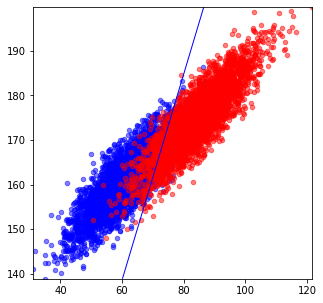

In [94]:
helper.plotBoundary(X, y,  clf, 100)

In [108]:
X_scaled = preprocessing.scale(X)
clf = LogisticRegression(random_state=3,
                         multi_class='auto',C=1e20, max_iter=10000,solver='sag',tol=1e-9,fit_intercept=True)

In [109]:
%time clf.fit(X_scaled, y)

Wall time: 29 ms


LogisticRegression(C=1e+20, max_iter=10000, random_state=3, solver='sag',
                   tol=1e-09)

In [110]:
clf.intercept_

array([-0.01766833])

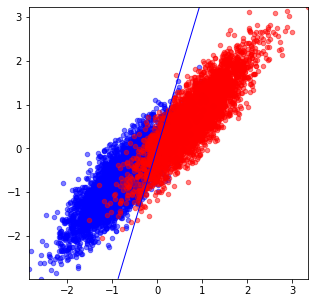

In [111]:
helper.plotBoundary(X_scaled, y,  clf, 100)

# Gráfica de la función de costo con observaciones normalizadas

In [112]:
import numpy as np
w1=np.linspace(-100,100,100)
w2=np.linspace(-100,100,100)
w1,w2=np.meshgrid(w1,w2)
W=np.vstack([w1.flatten(),w2.flatten()])
aux1=1/(1+np.exp(-np.dot(X_scaled,W)-clf.intercept_[0]))
aux2=1/(1+np.exp(np.dot(X_scaled,W)+clf.intercept_[0]))
y_aux=np.repeat(y,aux1.shape[1]).reshape(aux1.shape)
loss=(y_aux*aux1+(1-y_aux)*aux2)/X_scaled.shape[0]
loss=loss.sum(axis=0).reshape(w1.shape)

C:\Users\jvidela\AppData\Local\Temp/ipykernel_28900/1991404423.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


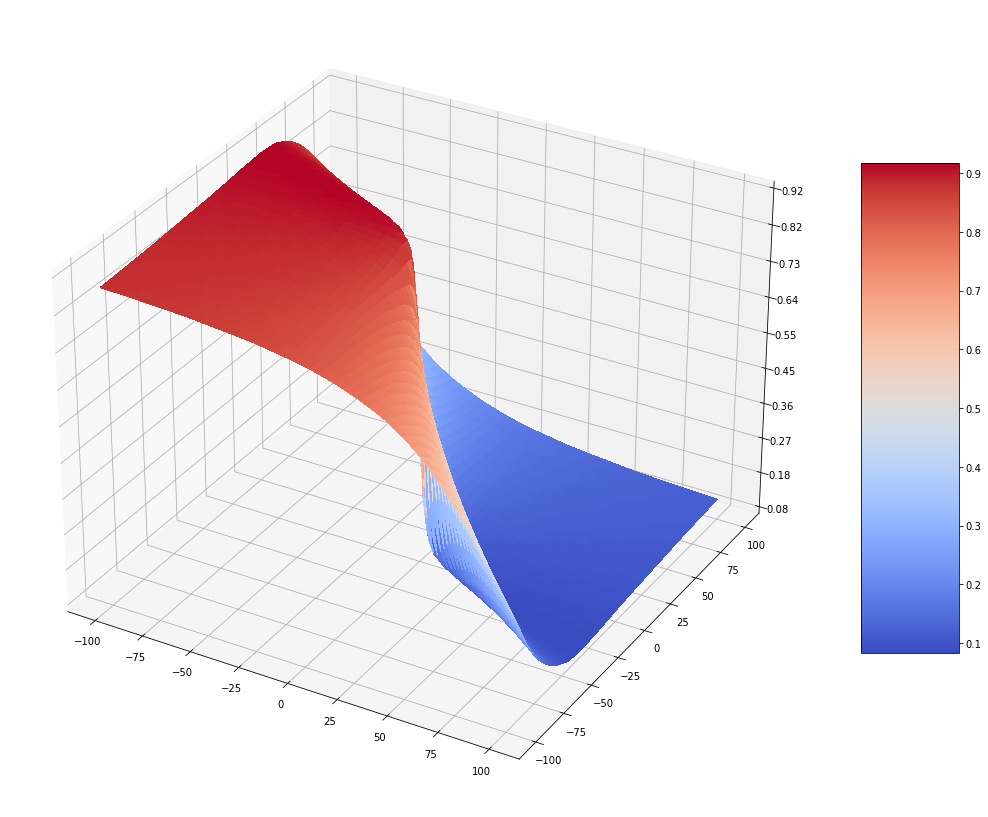

In [113]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=[18,18])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(w1, w2, loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Gráfica de la función de costo con observaciones sin normalizar

In [116]:
import numpy as np
w1=np.linspace(-100,100,100)
w2=np.linspace(-100,100,100)
w1,w2=np.meshgrid(w1,w2)
W=np.vstack([w1.flatten(),w2.flatten()])
aux1=1/(1+np.exp(-np.dot(X,W)-clf.intercept_[0]))
aux2=1/(1+np.exp(np.dot(X,W)+clf.intercept_[0]))
y_aux=np.repeat(y,aux1.shape[1]).reshape(aux1.shape)
loss=(y_aux*aux1+(1-y_aux)*aux2)/X.shape[0]
loss=loss.sum(axis=0).reshape(w1.shape)

C:\Users\jvidela\AppData\Local\Temp/ipykernel_28900/845061121.py:6: RuntimeWarning: overflow encountered in exp
  aux1=1/(1+np.exp(-np.dot(X,W)-clf.intercept_[0]))
C:\Users\jvidela\AppData\Local\Temp/ipykernel_28900/845061121.py:7: RuntimeWarning: overflow encountered in exp
  aux2=1/(1+np.exp(np.dot(X,W)+clf.intercept_[0]))


C:\Users\jvidela\AppData\Local\Temp/ipykernel_28900/1991404423.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


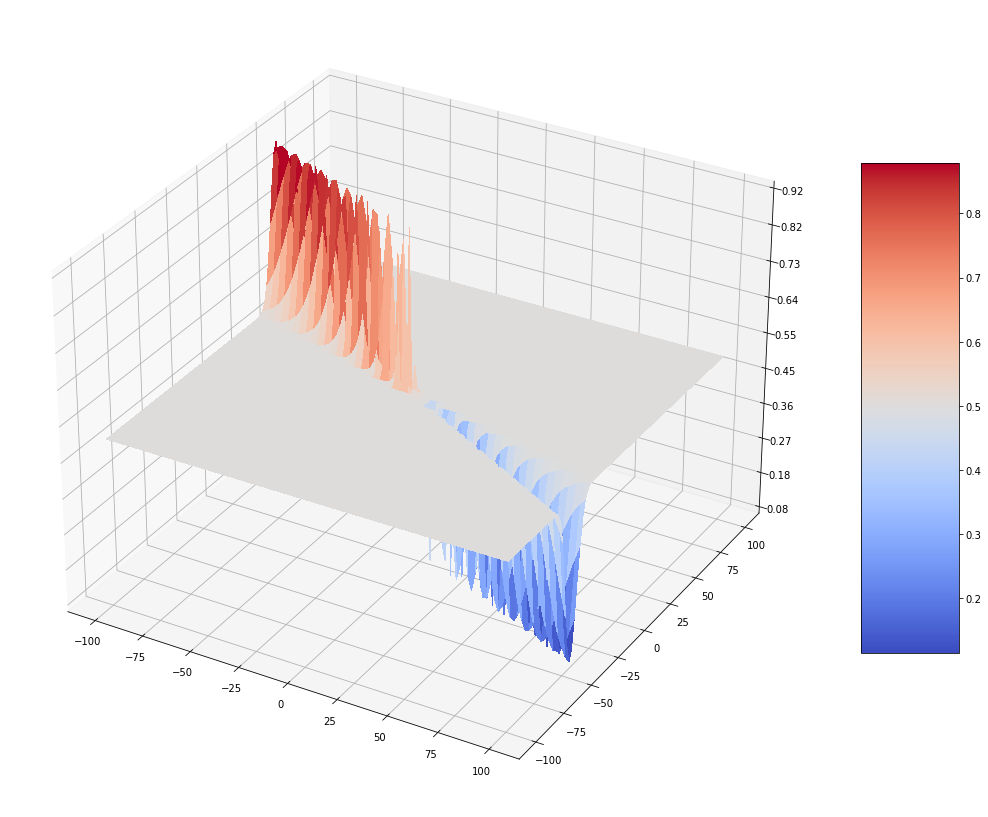

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=[18,18])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(w1, w2, loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()